Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.  It shares the same image size and structure of training and testing splits.

- ## Try to build a classifier for the Fashion-MNIST dataset that achieves over 85% accuracy on the test set. 
- ## Use only classifiers that are used in the Chapter 3 of the textbook.
- ## Do the error analysis following the textbook.

In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('', kind='train')
X_test, y_test = mnist_reader.load_mnist('', kind='t10k')

In [14]:
X_train.shape

(60000, 784)

In [15]:
y_train.shape

(60000,)

### Labels
Each training and test example is assigned to one of the following labels:

Label	Description
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [16]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")

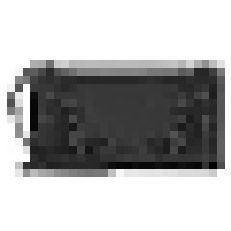

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X_train[36001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

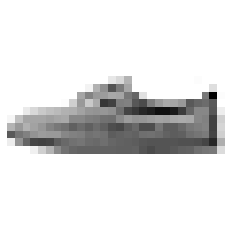

In [18]:
plot_digit(X_train[40000])

In [19]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

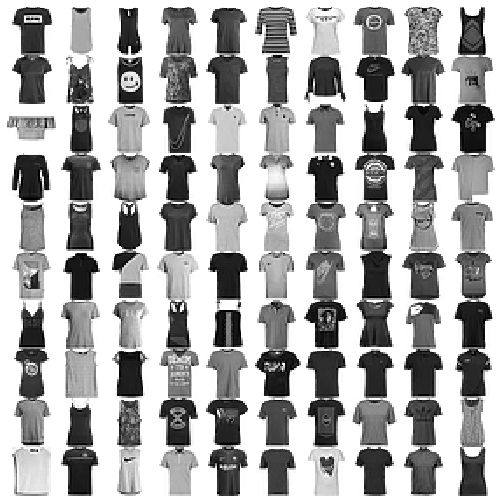

In [20]:
plt.figure(figsize=(9,9))
X_0 = X_train[(y_train == 0)] # T-shirt/top
example_images = X_0[:100]
plot_digits(example_images, images_per_row=10)

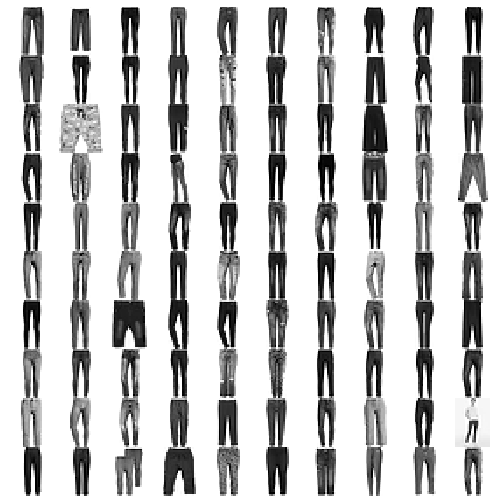

In [21]:
plt.figure(figsize=(9,9))
X_1 = X_train[(y_train == 1)] # Trousers
example_images = X_1[:100]
plot_digits(example_images, images_per_row=10)

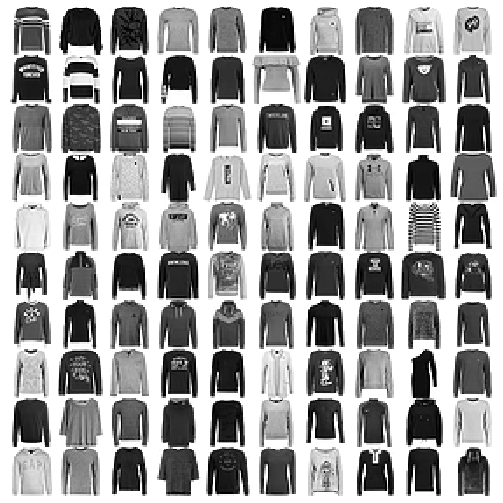

In [22]:
plt.figure(figsize=(9,9))
X_2 = X_train[(y_train == 2)] # Pullover
example_images = X_2[:100]
plot_digits(example_images, images_per_row=10)

Define shortcut for labels

In [23]:
y_train_tshirt = y_train == 0
y_train_trouser = y_train == 1
y_train_pullover = y_train == 2
y_train_dress = y_train == 3
y_train_coat = y_train == 4
y_train_sandal = y_train == 5
y_train_shirt = y_train == 6
y_train_sneaker = y_train == 7
y_train_bag = y_train == 8
y_train_boot = y_train == 9

y_test_tshirt = y_test == 0
y_test_trouser = y_test == 1
y_test_pullover = y_test == 2
y_test_dress = y_test == 3
y_test_coat = y_test == 4
y_test_sandal = y_test == 5
y_test_shirt = y_test == 6
y_test_sneaker = y_test == 7
y_test_bag = y_test == 8
y_test_boot = y_test == 9

### Mislaballed

We can see that this data has some mislabelling. I could see that a dress was put in the pullover category, pullover in coats. Evern some tshirts in shirts and viseversa. This natural due to the amibiguity of label definitions. I also noticed that the shirt data has pictures of a image with two shirt one over the other and the trouser label had an image of a person wearing toursers. I do not believe these will cause any error in data or make differences but they it note worthy

# Binary classifier 

We will use y_train and y_test to train a binary classification for now. We make a bag and not bag model

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_bag)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([ True])

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_bag, cv=3, scoring="accuracy")

array([0.97555, 0.97765, 0.97845])

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_bag):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_bag[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_bag[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.97555
0.97765
0.97845


In [17]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_bag, cv=3, scoring="accuracy")

array([0.90145, 0.89855, 0.9    ])

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_bag, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_bag, y_train_pred)

array([[53428,   572],
       [  795,  5205]])

In [21]:
y_train_perfect_predictions = y_train_bag  # pretend we reached perfection
confusion_matrix(y_train_bag, y_train_perfect_predictions)

array([[54000,     0],
       [    0,  6000]])

In [22]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_bag, y_train_pred)

0.9009866712826726

In [23]:
5205 / (5205 + 572)

0.9009866712826726

In [24]:
recall_score(y_train_bag, y_train_pred)

0.8675

In [25]:
5205 / (5205 + 795)

0.8675

In [26]:
from sklearn.metrics import f1_score

f1_score(y_train_bag, y_train_pred)

0.8839262970196144

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([28408.52683328])

In [28]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [29]:
y_some_digit_pred

array([ True])

In [30]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_bag, cv=3,
                             method="decision_function")

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_bag, y_scores)

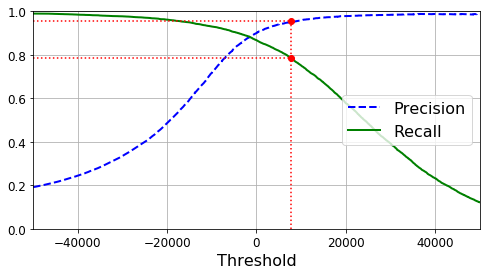

In [33]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.955], "r:")         # Not shown
plt.plot([-50000, 7813], [0.955, 0.955], "r:")      # Not shown
plt.plot([-50000, 7813], [0.785, 0.785], "r:")# Not shown
plt.plot([7813], [0.955], "ro")                   # Not shown
plt.plot([7813], [0.785], "ro")                # Not shown
plt.show()

In [34]:
(y_train_pred == (y_scores > 0)).all()

True

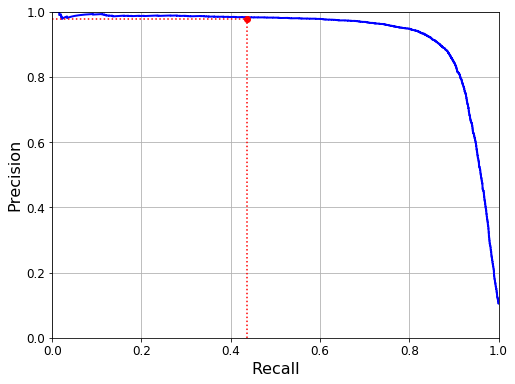

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.976], "r:")
plt.plot([0.0, 0.4368], [0.976, 0.976], "r:")
plt.plot([0.4368], [0.976], "ro")
plt.show()

In [36]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [37]:
threshold_90_precision

-40.23665177605062

In [38]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [39]:
precision_score(y_train_bag, y_train_pred_90)

0.9000691562932227

In [40]:
recall_score(y_train_bag, y_train_pred_90)

0.8676666666666667

# ROC curves

In [41]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_bag, y_scores)

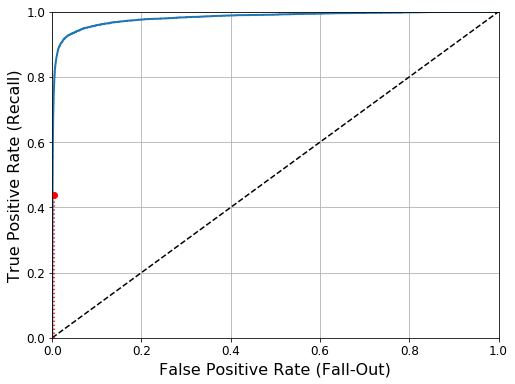

In [42]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_bag, y_scores)

0.9819300648148148

In [44]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_bag, cv=3,
                                    method="predict_proba")

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_bag, y_scores)

0.9819300648148148

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_bag, cv=3,
                                    method="predict_proba")

In [47]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_bag,y_scores_forest)

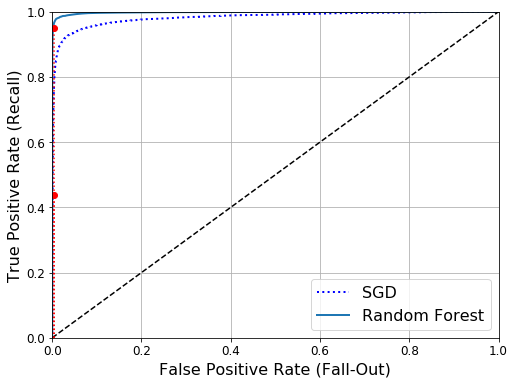

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [49]:
roc_auc_score(y_train_bag, y_scores_forest)

0.9977896851851851

In [50]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_bag, cv=3)
precision_score(y_train_bag, y_train_pred_forest)

0.9787124463519313

In [51]:
recall_score(y_train_bag, y_train_pred_forest)

0.9501666666666667

# Multiclass classification

In [74]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
svm_clf.predict([some_digit])

array([7], dtype=uint8)

In [75]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 8.13245833,  7.09447738, -0.19146779,  0.85706894,  1.89571188,
         5.00847088,  4.00847088,  9.18867925,  6.05856737,  2.97849587]])

In [76]:
np.argmax(some_digit_scores)

7

In [77]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [78]:
svm_clf.classes_[5]

5

In [79]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([7], dtype=uint8)

In [80]:
len(ovr_clf.estimators_)

10

In [81]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([8], dtype=uint8)

In [82]:
sgd_clf.decision_function([some_digit])

array([[-54469.63614916, -88218.71524444, -38968.58780933,
        -70297.94122649, -81946.81369153, -56077.61777818,
        -19797.07087073, -46342.52582376,  34668.53055572,
        -79468.49114506]])

In [83]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.78315, 0.81355, 0.82255])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Users/aakibshaikh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/aakibshaikh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Multilabel classification 

In [26]:
from sklearn.neighbors import KNeighborsClassifier

y_train_footwear = (y_train_sneaker | y_train_boot | y_train_sandal)
y_train_opentoe = (y_train_sandal)
y_multilabel = np.c_[y_train_footwear, y_train_upperwear]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Lets pick some sneaker and is the output of your model

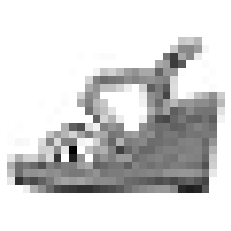

In [49]:
some_sandal = X_train[41001]
some_sandal_image = some_sandal.reshape(28, 28)
plt.imshow(some_sneaker_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

In [50]:
knn_clf.predict([some_sneaker])

array([[ True,  True]])

As we can see a sandal is a footwear and opentoe

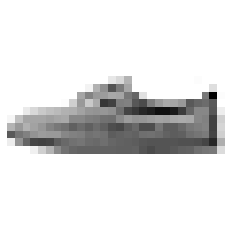

In [52]:
some_sneaker = X_train[40000]
some_sneaker_image = some_sneaker.reshape(28, 28)
plt.imshow(some_sneaker_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

In [ ]:
knn_clf.predict([some_sneaker])

**Warning**: the following cell may take a very long time (possibly hours depending on your hardware).

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

# Multioutput classification

In [55]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

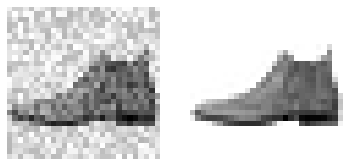

In [58]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

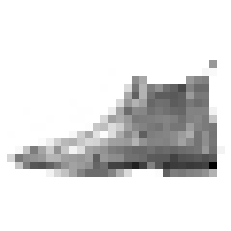

In [60]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

# Dummy Random Classifier

In [61]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_bag, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

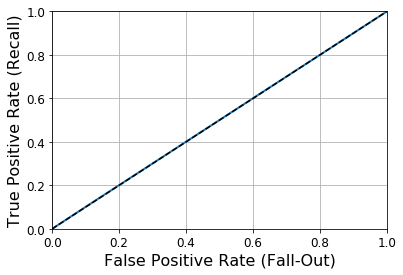

In [62]:
fprr, tprr, thresholdsr = roc_curve(y_train_bag, y_scores_dmy)
plot_roc_curve(fprr, tprr)

# Train a model (KNN classifier)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [64]:
y_knn_pred = knn_clf.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.8597

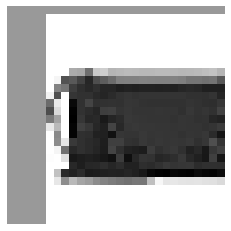

In [66]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [67]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

In [68]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [69]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [72]:
accuracy_score(y_test, y_knn_expanded_pred)

0.8594

In [ ]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

In [ ]:
plot_digit(ambiguous_digit)

## Misclassification

I believe the model is low on the accuracy and has misclassify due to ambiguity in labels and the processing of many features in the images. Furthermore the mislabelling does play a role but I do not think removing them or correcting will have drastic difference in the model performance